## Tratando os Dados e Treinando um Modelo de Inteligência Artificial

Este código foi desenvolvido a partir do estudo realizado com base no Capítulo 2 do livro **Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow**.
O dataset, *housing.csv*, disponibilizado pelo autor do livro é um conjunto de dados trabalhado em um artigo de 1997 intitulado *Sparse Spatial Autoregressions*, escrito por Pace, R. Kelley e Ronald Barry, publicado no periódico **Statistics and Probability Letters**. Eles o construíram usando os dados do censo da Califórnia de 1990. Cada linha do conjunto de dados representa um grupo de blocos do censo. Um grupo de blocos é a menor unidade geográfica para a qual o U.S. Census Bureau publica dados amostrais (geralmente com uma população entre 600 e 3.000 pessoas).

Portanto, iremos explorar as diveferentes abordagens de tratamento de dados e treinamento de modelos com intuito de **fazer previsões do preço médio de uma casa**. 

In [67]:
# Carregando dados
import pandas as pd
housing = pd.read_csv('housing.csv')

### Estrutura dos Dados:

Uma **Instância** representa uma linha na tabela de dados. Já um **Atributo** representa uma coluna na tabela.Cada atributo representa uma propriedade ou aspecto dos dados que pode ajudar a distinguir padrões e fazer previsões.

In [68]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [70]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [71]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Dados:** Representam informações sobre os bairros da Califórnia na década de 90.

**Contagem (count):** Indica quantos valores não nulos existem em cada coluna.

**Média (mean):** Média aritmética dos valores de cada coluna.

**Desvio Padrão (std):** Indica a dispersão dos dados.
- Valor alto: Os dados são heterogêneos, com muita variação.
- Valor baixo: Os dados são mais homogêneos, com pouca variação.

**Mínimo (min) e Máximo (max):** Mostram os valores extremos.
  - Note que "median_house_value" apresenta no máximo de 500.001, o que sugere um limite no dataset.

**Quartis (25%, 50%, 75%):** Mostram a distribuição dos dados.
  - Por exemplo, em median_house_value:
    - 25% dos bairros têm casas abaixo de 119.600 dólares.
    - 50% têm casas abaixo de 179.700 dólares (mediana).
    - 75% estão abaixo de 264.725 dólares.

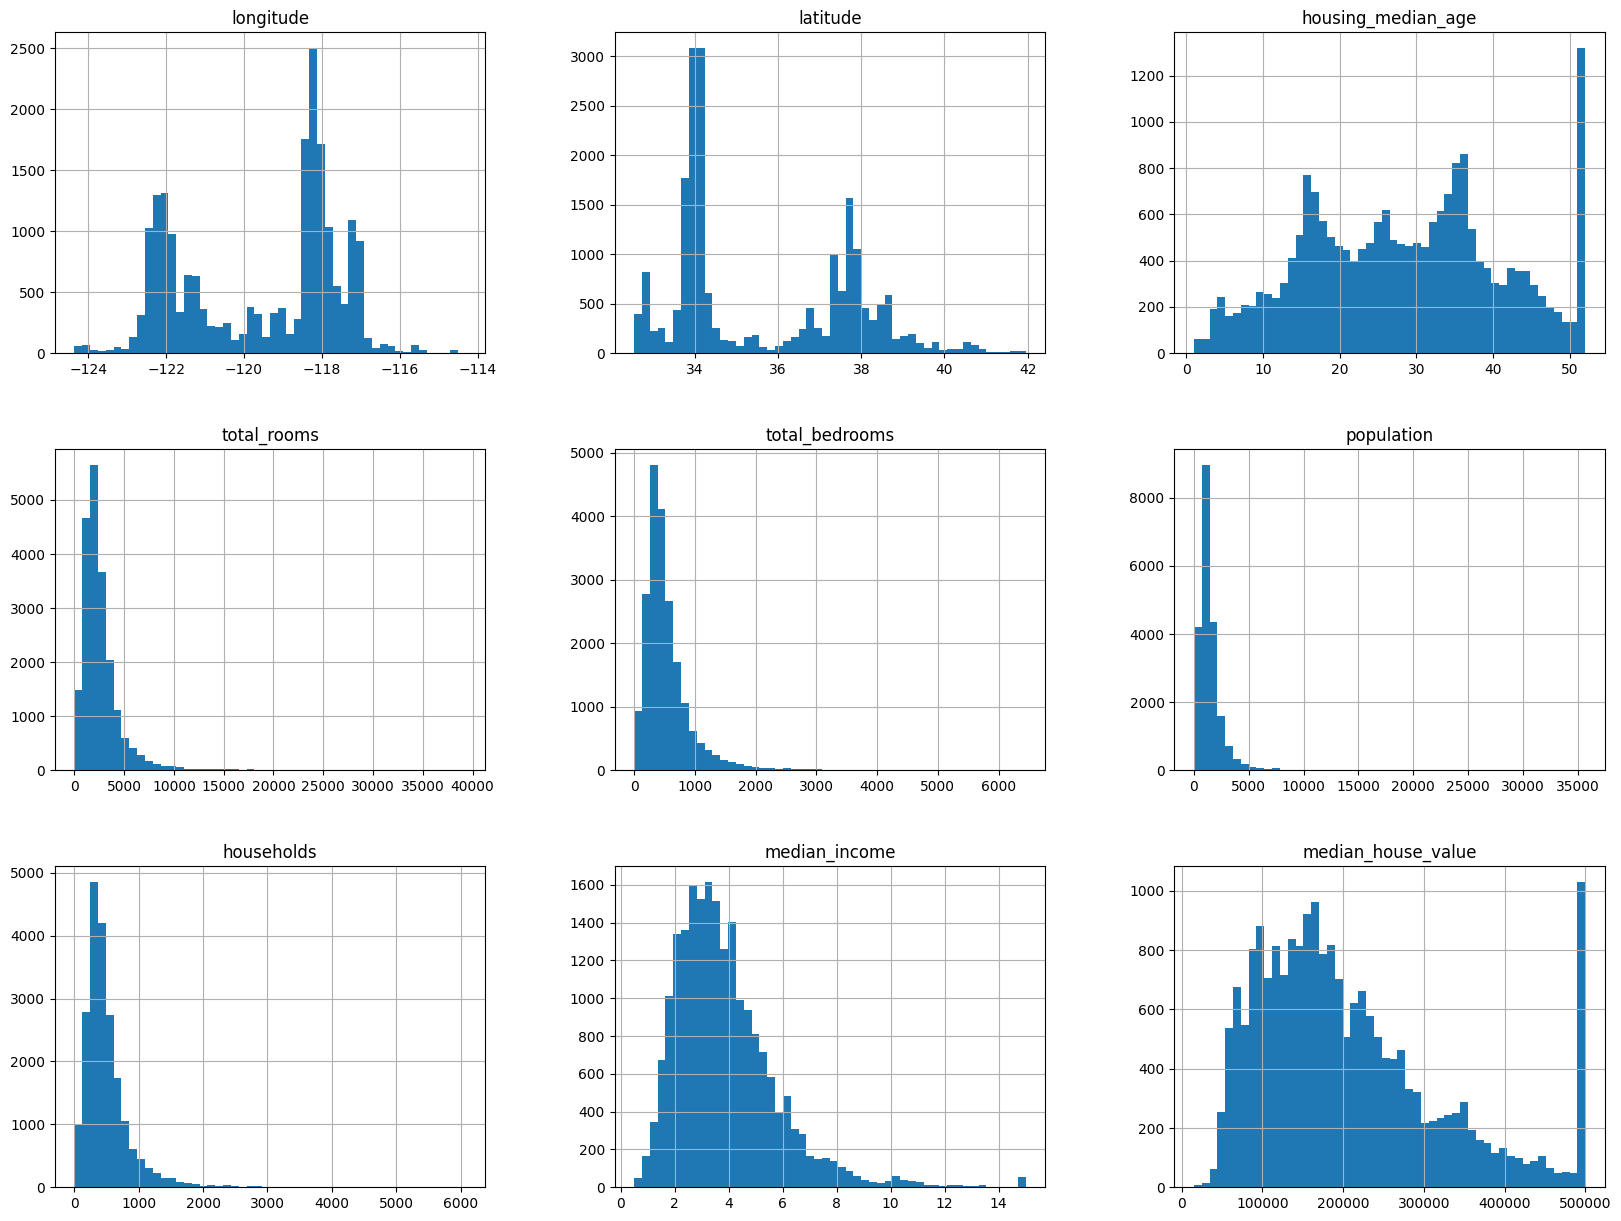

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Criando conjunto de Testes

In [73]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size =int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [74]:
# 20% dos dados para conjunto de teste
train_set, test_set = split_train_test(housing, 0.2)
print("Dados de Treinamento:",len(train_set))
print("Dados de Teste:", len(test_set))

Dados de Treinamento: 16512
Dados de Teste: 4128


Se dividirmos os dados aleatoriamente toda vez que atualizarmos o dataset, algumas instâncias que estavam no conjunto de treino podem acabar no teste, e vice-versa. Isso pode comprometer a avaliação do modelo, pois o conjunto de teste precisa ser fixo para comparações justas.

Para garantir que o conjunto de testes seja consistente toda vez que executarmos o código podemos utilizar definifir uma seed com *"np.random.seed(int)"*. Isso funciona bem em muitos casos, especialmente quando o conjunto de dados é grande e diversificado. Se o conjunto de dados for pequeno (ou se o número de atributos for grande em relação ao tamanho do conjunto de dados), a amostragem aleatória pode levar a **viés de amostragem**. O mesmo ocorre quando a amostra selecionada não representa adequadamente a distribuição real dos dados. Além disso, essa solução não irá funcionar se o **conjunto de dados for atualizado**.

Para isso, podemos utilizar outra abordagem:
- Utilizar o identificador **único** de cada instância para definir se deve ou não fazer parte de conjunto de testes. Assim, geramos um Hash desse identificador, podemos convertê-lo para número para facilitar comparações e pegamos um limite de 20% do maior valor possível de hash. Se o hash da instância for menor que esse limite, ela vai para o teste. Caso contrário, vai para o treino. 

In [75]:
# Como esse conjunto de dados não possui um identificador único, podemos utilizar simplesmente os índicies.
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [76]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Porém, se utilizarmos os índices como identificadores únicos temos que garantir que novos dados serão sempre inseridos ao final do conjunto de dados. Caso não seja possível garantir isso, podemos utilizar dados estáveis (como longitude e latitude) para criar um identificador.

In [77]:
# Criando identificador único
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
housing_with_id.head()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Vamos supor que existe uma variável crítica, *median_income*, queremos garantir que o conjunto de teste seja representativo ao dividir um conjunto de dados para treinamento e teste. 

A renda mediana é uma variável numérica contínua, o que significa que ela pode assumir uma ampla gama de valores. Para garantir que o conjunto de teste seja representativo, é necessário transformar essa variável contínua em categorias discretas (estratos). Isso é essencial para garantir que o conjunto de teste seja representativo de todas as faixas de valores da variável. Isso evita viés de amostragem, preserva a distribuição original dos dados, melhora a generalização do modelo e facilita a avaliação do desempenho em diferentes grupos.

Isso ajuda a garantir que o modelo seja avaliado de forma justa e que ele generalize bem para todas as faixas de renda.

In [78]:
# Criando um atributo de renda com cinco categorias para representar melhor a renda média

housing["income_cat"] = pd.cut(housing["median_income"], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: >

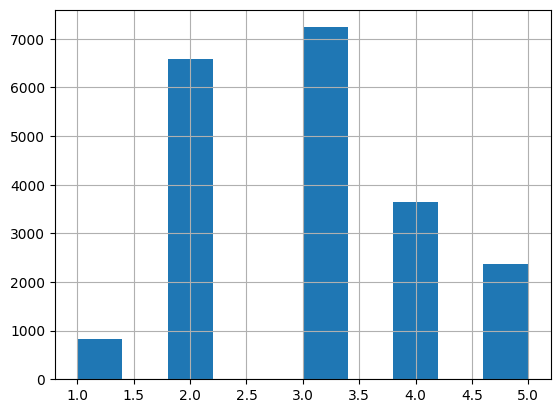

In [79]:
housing["income_cat"].hist()

#### Relizando **Amostragem Estratificada** com Scikit Learn:

É um método de divisão estratificada e aleatória dos dados em conjuntos de treino e teste, garantindo que a distribuição de uma variável alvo seja preservada em ambas as partes. Isso é útil quando os dados possuem classes desbalanceadas ou uma variável contínua que precisa ser representada proporcionalmente.

In [80]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
# Amostragem estratificada com base na categoria de Renda
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [81]:
# Comparando viés gerado a partir da Amostragem Aleatória com a Amostragem Estratificada
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [82]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Explorando e Visualizando os Dados

In [83]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

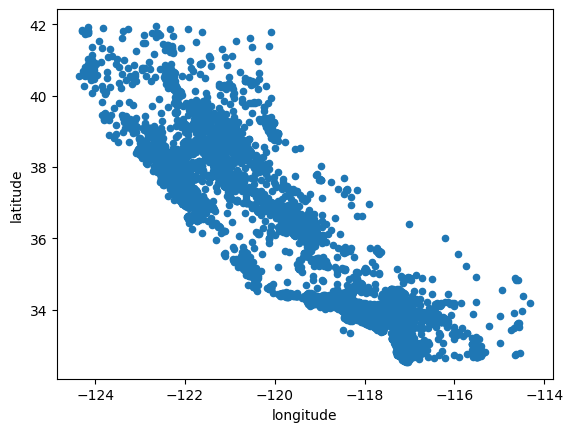

In [84]:
# Dispersão geográfica dos dados
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

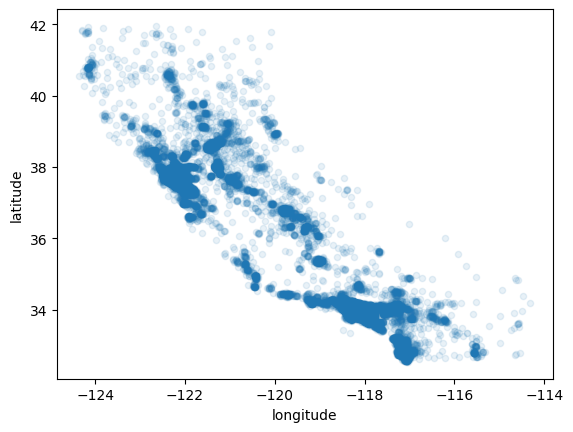

In [85]:
# Destaque maior para áreas de alta densidade
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

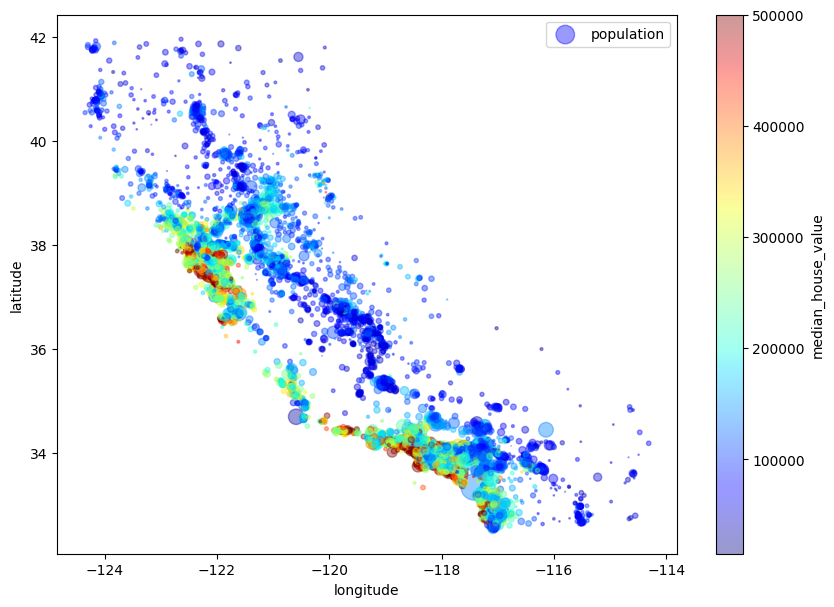

In [86]:
# Preço médio das moradias na Califórnia
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

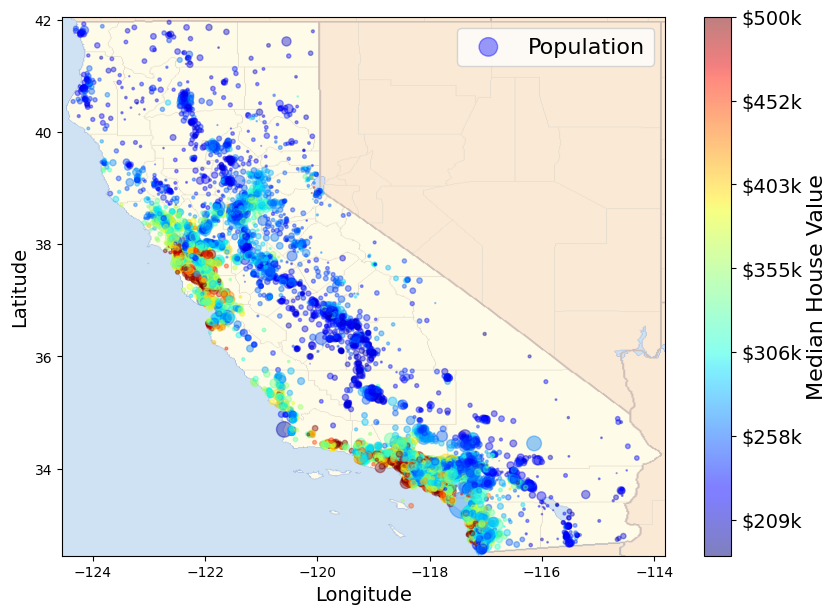

In [87]:
import matplotlib.image as mpimg
california_img=mpimg.imread("california.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7), s=housing['population']/100, label="Population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Buscando Correlações

In [88]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [89]:
corr_matrix = housing.drop(columns=["ocean_proximity"]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Coeficientes variam de -1 à 1.
- Quando próximo a 1 significa que existe uma forte correlação positiva. Por exemplo, o valor médio do imóvel costuma subir quando a renda média aumenta.
- Quando próximo a -1 significa que há uma correlação negativa. Como por exemplo os preços diminuem a medida que vamos para o Norte.
- Coeficientes próximos de zero significam que não há correlação **linear**.

In [90]:
# Selecionando os atributos mais promissores que parecem mais correlacionados ccom o valor médio dos imóveis
# Caso não selecionarmos os atributos mais promissores iríamos obter 121 plotagens
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

NameError: name 'scatter_matrix' is not defined

<Axes: xlabel='median_income', ylabel='median_house_value'>

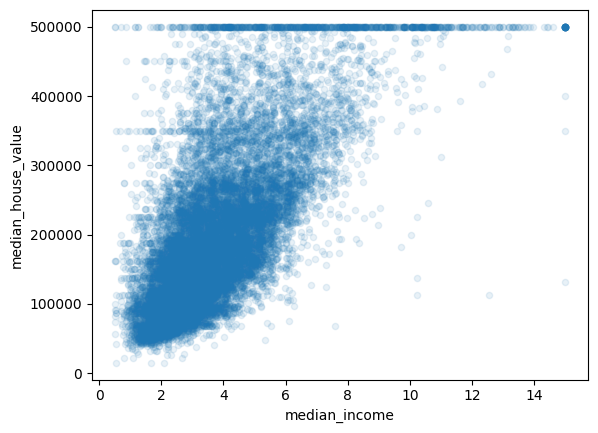

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

Essa plotagem revela que a correlação é realmente forte, é possível ver uma tendência ascendente, e os pontos não estão muito dispersos.
Além disso, é possível perceber uma linha na faixa de 500 mil dólares, por causa da limitação da base de dados. Mas também podemos percer outras linhas, em 450, 350 e 280. Podemos tentar remover essas regiões correspondentes para evitar que o algoritmo aprenda a reproduzir essas peculiaridades dos dados. 

Temos alguns problemas:
- A linha forte em 500 mil dólares sugere um teto imposto na base de dados. Isso pode levar o modelo a subestimar o valor real de imóveis mais caros, porque ele nunca viu preços acima desse limite.
- Outras linhas em 450k, 350k e 280k podem ter origem similar — talvez sejam valores comuns em políticas de precificação ou regras do mercado imobiliário local. Se o modelo aprender esses padrões artificiais, ele pode prever valores errados, não baseados em relações reais dos dados, mas sim nessas restrições.
- Redes neurais e modelos de machine learning são muito bons em detectar padrões. Se o dataset tem muitos valores agrupados em certos números, o modelo pode:
    - Memorizar essas faixas em vez de aprender a relação real entre renda e preço.
    - Ignorar variações naturais que são mais importantes para generalização.
    - Gerar previsões enviesadas, exagerando a frequência dessas faixas quando fizer previsões para novos dados.

Isso afeta a capacidade preditiva do modelo e pode fazer com que ele tenha um desempenho ruim no mundo real.

#### Calda Longa de Distribuição

Após fazer a correlação dos atributos alguns desses podem apresentar uma **calda longa de distribuição**, assim sendo, talvez seja melhor transformá-los, como por exemplo calcular o logaritmo. 

Uma cauda longa em uma distribuição significa que há **valores extremos** (outliers) ou uma **dispersão assimétrica dos dados**. Isso pode ser observado em distribuições como a log-normal, onde a maioria dos dados está concentrada em valores baixos, mas há alguns valores muito altos que se estendem para a direita. Transformar esses atributos pode ajudar a melhorar a performance do modelo.

- Por que transformar atributos com caudas longas?
    - **Redução de assimetria:** Muitos algoritmos de Machine Learning assumem que os dados são normalmente distribuídos ou pelo menos simétricos. A transformação pode reduzir a assimetria, tornando a distribuição mais próxima da normal.
    - **Redução do impacto de outliers:** Valores extremos podem dominar o comportamento do modelo, especialmente em algoritmos sensíveis à escala dos dados, como regressão linear ou métodos baseados em distância (e.g., KNN). A transformação pode reduzir o impacto desses outliers.
    - **Melhoria na convergência:** Alguns algoritmos, como os baseados em gradiente, podem convergir mais rapidamente quando os dados estão em uma escala mais uniforme.

Dessa forma, a transformação logarítmica comprime a escala dos valores altos mais do que os valores baixos, reduzindo a dispersão e a assimetria. Isso pode tornar a distribuição mais simétrica e aproximá-la de uma distribuição normal.

**Interpretação:** Após a transformação, a interpretação dos coeficientes do modelo pode mudar. Por exemplo, em uma regressão linear, um coeficiente para log(renda) representa uma mudança percentual em vez de uma mudança absoluta.

### Testando combinações de Atributos

**Explorar novas correlações** e criar **atributos derivados** é essencial para melhorar o desempenho do modelo, pois muitas vezes as variáveis originais não capturam totalmente os padrões subjacentes nos dados. Novos atributos, como a média de quartos por domicílio (*rooms_per_household*) ou a proporção de quartos que são dormitórios (*bedrooms_per_room*), podem revelar insights importantes que antes passavam despercebidos. Esses recursos ajudam o modelo a entender melhor as relações entre os dados e podem levar a previsões mais precisas, reduzindo vieses e melhorando sua capacidade de generalização.

In [28]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [29]:
corr_matrix = housing.drop(columns=["ocean_proximity"]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

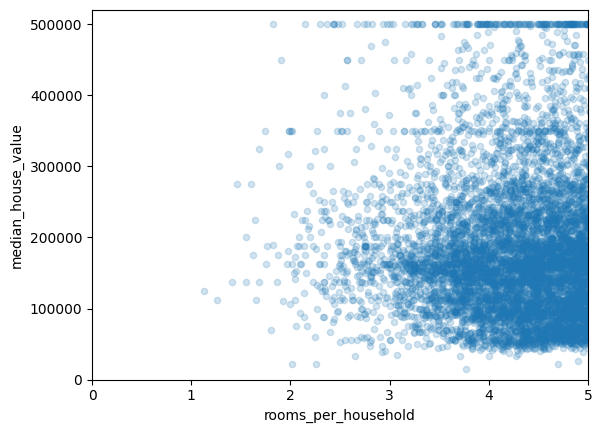

In [30]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### Preparando os dados para o Algoritmo de Aprendizado de Máquina

In [32]:
# Vamos reverter para o conjunto de dados limpo e vamos separar os previsores e os rótulos. Pois não queremos necessáriamente aplicar as mesmas transformações em ambos.
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Limpando os Dados

A maioria dos algoritmos de ML não funcionam com atributos contendo valores Nulos. Sendo assim, devemos tratar esses atributos.
Podemos:
1. Abrir mão das instâncias que apresentam atributos com valores faltantes.
    - *housing.dropna(subset=["total_bedrooms"])*
2. Abrir mão dos atributos que apresenta valores faltantes.
    - *housing.drop("total_bedrooms", axis=1)*
3. Atribuir valores substituindo o valor Nulo. (zero, média, mediana, etc)
    - *median = housing["total_bedrooms"].median()*
    - *housing["total_bedrooms"].fillna(median, inplace=True)*

In [33]:
# Utilizando Scikit learn para lidar com valores ausentes a partir da média
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Visto que a média só pode ser calculada a partir de atributos numéricos vamos criar uma cópia dos dados sem o atributo de texto "ocean_proximity"
housing_num = housing.drop("ocean_proximity", axis=1)

# imputer calcula a média de cada atributo e armazena na variável statistics 
imputer.fit(housing_num)

# housing_num.median().values, ou:
imputer.statistics_

# Substituindo os valores ausentes pela média calculada:
X = imputer.transform(housing_num) # array NumPy

# Colocando de volta ao DataFrame do Pandas:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

### Manipulando texto e atributos categóricos

In [34]:
# Podemos notar que existe um número limitado de valores para "ocean_proximity", ou seja, trata-se de um atributo categórico
housing_cat = housing[["ocean_proximity"]]

# A maioria dos algoritmos de ML trabalham apenas com número, então vamos converter esses atributos em números
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [35]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Um dos problemas com essa representação é que os algoritmos assumem que dois valores próximos são mais semelhantes que dois valores distantes. Nesse caso, iria gerar uma interpretação errada. Dessa forma, podemos criar um atributo binário por categoria. Ou seja, temos 5 categorias possíveis ('1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN') então iremos criar 5 colunas na tabela contendo valores binários (1 quando a categoria está presente naquela linha e 0 caso contrário)

Agora, o modelo pode entender a informação categórica sem interpretá-la como um valor numérico ordenado, o que poderia gerar inferências erradas.

In [36]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

### Customizando os Transformadores

Podemos escrever nossos próprios transformadores para tarefas como transformações personalizadas, operações de limpeza ou combinação de atributos específicos. Podemos escrever o seguinte tranformador que adiciona os atributos combinados discutidos anteriormente ("*rooms_per_household*", "*bedrooms_per_room*" , "*population_per_household*").

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], shape=(16512, 11), dtype=object)

In [39]:
# Adicionando os atributos novos na tabelela de dados
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### Escalonamento das Características

Algoritmos de ML não funcionam muito bem quando os valores dos atributos variam possuem escalas diferentes. Por exemplo, o número total de cômodos varia de 6 à 39320, e a renda média varia apenas de 0 a 15. Portanto, podemos aplicar, por exemplo, o escalonamento min-max ou a padronização. 

- A **Normalização** transforma os valores para um intervalo fixo (de 0 à 1). Porém, é muito sensível a **outliers**.
- Já a **Padronização** não limita os valores dentro de um intervalo fixo e os transformam em uma distribuição com média = 0 e desvio padrão = 1. Sendo **menos** sensível à outliers.

Dessa forma, as variáveis tornam-se mais facilmente comparáveis.

### Transformação de Pipelines

Uma **pipeline** é uma sequência automatizada de transformações de dados e treinamento de modelos. 

In [40]:
# Pipeline para preencher valores ausentes usando a mediana da coluna, adicionar novos atributos (rooms_per_household, population_per_household e bedrooms_per_room) e padronizar os dados.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
# Aplica Pipeline completa de pré-processamento. Aplicando a Pipeline anterior e transformando valores categóricos em variáveis binárias (one-hot encoding).

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs),])

housing_prepared = full_pipeline.fit_transform(housing)
